<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Kickstarter_logo.svg">

Launched in 2009, Kickstarter has now became a world famous online crowdfunding platform. The platform mainly focus on creativity and merchandising, which has made some of the most fantastic ideas to come true.

The crowdfunding process is simple:

- Project owners propose their projects and provide related information such as idea, pricing, schedule, etc.
- Backers back the projects that seems attractive

# The aim of this project is to use current data to predict future Kickstarter project on whether they will succeed or fail. 

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV

import time
import os

In [220]:
ksdf = pd.read_csv("ks_projects.csv", sep=",", engine="python")

ksdf.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [221]:
ksdf.groupby("main_category").nunique().count()

ID                  15
name                15
category            15
main_category       15
currency            15
deadline            15
goal                15
launched            15
pledged             15
state               15
backers             15
country             15
usd pledged         15
usd_pledged_real    15
usd_goal_real       15
dtype: int64

In [222]:
ksdf.groupby("category").nunique().count()

ID                  159
name                159
category            159
main_category       159
currency            159
deadline            159
goal                159
launched            159
pledged             159
state               159
backers             159
country             159
usd pledged         159
usd_pledged_real    159
usd_goal_real       159
dtype: int64

In [223]:
ksdf.shape

(378661, 15)

- - - 

The dataset has 15 variables. Considering variables ID, name, currency, deadline date, launched date and country as self explanatory, details on other variables are as follow

**Main_Category**: There are 15 main categories for the project. These main categories broadly classify projects based on topic and genre they belong to.

**Category**: Main Categories are further sub divided in categories to give more general idea of the project. For example, Main Category “Technology” has 15 categories like Gadgets, Web, Apps, Software etc. There are 159 total categories.

**Backers**: These are number of people who have supported the project by pledging some amount.

**USD_Goal_Real**: This is the goal amount which the company need to raise to start its project. The goal amount is important variable for company as if it is too high, the project may fail to raise that amount of money and be unsuccessful. If it is too low, then it may reach its goal soon and backers may not be interested to pledge more.

**USD_Pledged_Real**: This is amount raised by the company through its backers. On Kickstarter, if total amount pledged is lower than goal, then the project is unsuccessful and the start-up company doesn’t receive any fund. If pledged amount is more than the goal, the company is considered successful. The variable “usd pledged” is amount of money raised in US dollars.

**Pledged**: Similar to USD_Pledged_Real but might be in different currencies depedning the origin of the country.
We will use usd_pledged_real for further analysis.

- - - 


In [224]:
ksdf = ksdf.drop(["ID","pledged","usd pledged"],axis =1)

In [225]:
ksdf.isnull().sum()

#checking null

name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [226]:
ksdf[ksdf.name.isnull()]

,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real
166851,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,failed,1,US,100.00,200000.00
307234,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,failed,12,GB,316.05,3224.97
309991,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,suspended,0,US,0.00,2500.00
338931,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,failed,5,US,220.00,35000.00


In [227]:
ksdf = ksdf.dropna()

#You can't submit a project without name, it might be some technical error.

# **Modifying Data Columns**

***
- Finding out the duration (days) of the project
- Breaking down the launched/deadline into Day, Month and Year
***

In [228]:
ksdf["launched"] = ksdf["launched"].astype('datetime64[ns]')

In [229]:
#To drop the timestamp in "launched" column

ksdf["launched"] = ksdf["launched"].apply(lambda x: x.date())

ksdf["launched"] = ksdf["launched"].astype('datetime64[ns]')

In [230]:
ksdf.head()

,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,canceled,14,US,1283.0,19500.00


In [231]:
ksdf["deadline"]=ksdf["deadline"].astype("datetime64[ns]")

In [232]:
ksdf["duration"] = ksdf.deadline - ksdf.launched

ksdf.duration = ksdf.duration.dt.days

#calculating duration in term of days

In [233]:
#Breaking down deadline into day, month and year

ksdf["deadline_day"]= ksdf["deadline"].dt.dayofweek

#0 = Monday, 1 = Tuesday, 2 = Wednesday ...

In [234]:
ksdf['deadline_year'] = pd.DatetimeIndex(ksdf['deadline']).year
ksdf['deadline_month'] = pd.DatetimeIndex(ksdf['deadline']).month

In [235]:
#Dropping "deadline" column after breaking down.
ksdf = ksdf.drop("deadline", axis =1)

In [236]:
#Doing the same for launched date

ksdf["launched_day"]= ksdf["launched"].dt.dayofweek

In [237]:
ksdf["launched_year"] = pd.DatetimeIndex(ksdf["launched"]).year
ksdf["launched_month"] = pd.DatetimeIndex(ksdf["launched"]).month

In [238]:
#Dropping "Launched" column after breaking down.
ksdf = ksdf.drop("launched", axis =1)

In [239]:
ksdf.head()

,name,category,main_category,currency,goal,state,backers,country,usd_pledged_real,usd_goal_real,duration,deadline_day,deadline_year,deadline_month,launched_day,launched_year,launched_month
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,failed,0,GB,0.0,1533.95,59,4,2015,10,1,2015,8
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,failed,15,US,2421.0,30000.00,60,2,2017,11,5,2017,9
2,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,failed,3,US,220.0,45000.00,45,1,2013,2,5,2013,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,failed,1,US,1.0,5000.00,30,0,2012,4,5,2012,3
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,canceled,14,US,1283.0,19500.00,56,5,2015,8,5,2015,7


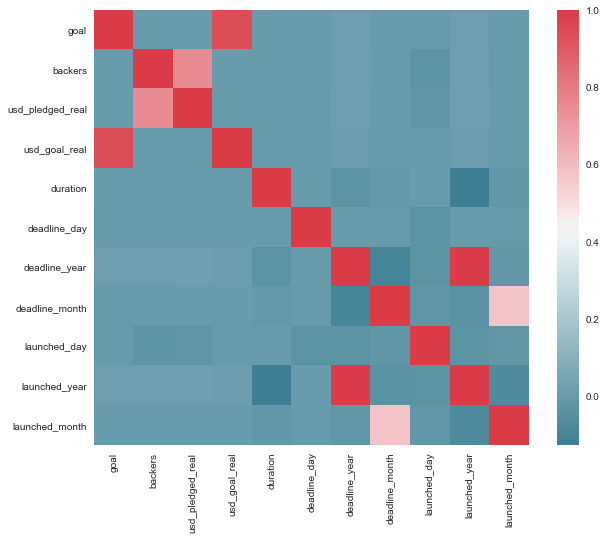

In [240]:
#Identifying the correlation between the different variables

fig, ax =plt.subplots(figsize=(10, 8))
ks_corr = ksdf.corr()
sns.heatmap(ks_corr, mask=np.zeros_like(ks_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

--- 
**Obeservation:**

1) Backers has a high correlation with pledged real amount.

2) Launched year and month has a high correlation with the deadline year and month.

---

--- 
Generating a new DataFrame ksdf_year for cross-year comparison

- Calculating overall number of proposed projects
- Overall successful rate
- Cross year comparison of above 2 items

---

In [241]:
ksdf["launched_year"].value_counts()

2015    77300
2014    67745
2016    57183
2017    52200
2013    44851
2012    41163
2011    26236
2010    10519
2009     1329
2018      124
1970        7
Name: launched_year, dtype: int64

In [242]:
ksdf = ksdf[ksdf.launched_year != 1970] 

#Stored at 0 unixtime, equals to null

In [243]:
ksdf_year = {}
for year in range(2009, 2019):
    ksdf_year[year] = ksdf[ksdf["launched_year"] == year]["launched_year"].count()

In [244]:
ksdf_year = pd.Series(ksdf_year)
ksdf_year = pd.DataFrame(ksdf_year)
ksdf_year = ksdf_year.rename(columns = {0: "counts"})

ksdf_year

,counts
2009,1329
2010,10519
2011,26236
2012,41163
2013,44851
2014,67745
2015,77300
2016,57183
2017,52200
2018,124


In [245]:
ksdf['state'].value_counts()

failed        197716
successful    133956
canceled       38773
undefined       3562
live            2799
suspended       1844
Name: state, dtype: int64

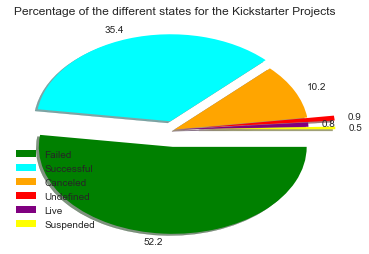

In [246]:
values = [52.2, 35.4, 10.2, 0.9, 0.8, 0.5]
colors = ['green', 'cyan', 'orange', 'red', 'purple', 'yellow']
labels = ['Failed', 'Successful', 'Canceled', 'Undefined', 'Live', 'Suspended']
explode = (0.2, 0.1, 0, 0.2, 0, 0.2)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Percentage of the different states for the Kickstarter Projects')
plt.legend(labels,loc=3)
plt.show()

In [247]:
#Calculting the success rate by year

success_peryear = []

for year in range(2009, 2019):
    success = len (ksdf[(ksdf['launched_year'] == year) & (ksdf['state'] == 'successful')]['state'])
    overall = len (ksdf[ksdf['launched_year'] == year]['launched_year'])
    ratio = success/ overall
    success_peryear.append(ratio)
    print ("Year = ",year ,"with success ratio of", ratio * 100, '%')

Year =  2009 with success ratio of 43.566591422121896 %
Year =  2010 with success ratio of 43.66384637322939 %
Year =  2011 with success ratio of 46.390455862174115 %
Year =  2012 with success ratio of 43.46621966328985 %
Year =  2013 with success ratio of 43.28777507747876 %
Year =  2014 with success ratio of 31.156542918296555 %
Year =  2015 with success ratio of 27.129366106080205 %
Year =  2016 with success ratio of 32.81744574436458 %
Year =  2017 with success ratio of 35.367816091954026 %
Year =  2018 with success ratio of 0.0 %


In [248]:
#2018 reflected 0% of success

ksdf[ksdf['launched_year'] == 2018]['state'].value_counts()

live        122
canceled      2
Name: state, dtype: int64

In [249]:
ksdf_year['success_ratio'] = success_peryear

ksdf_year.head()

,counts,success_ratio
2009,1329,0.435666
2010,10519,0.436638
2011,26236,0.463905
2012,41163,0.434662
2013,44851,0.432878


In [250]:
#Identifying the number of backers per year

backers_peryear = {}
for year in range(2009, 2019):
    backers_count = ksdf[ksdf['launched_year'] == year]['backers'].sum()
    backers_peryear[year] = backers_count

In [251]:
#Adding to ksdf_year

ksdf_year['backers'] = pd.Series(backers_peryear)

In [252]:
ksdf_year

,counts,success_ratio,backers
2009,1329,0.435666,43758
2010,10519,0.436638,406875
2011,26236,0.463905,1396468
2012,41163,0.434662,4343773
2013,44851,0.432878,6292568
2014,67745,0.311565,6194576
2015,77300,0.271294,7512058
2016,57183,0.328174,7148604
2017,52200,0.353678,6653360
2018,124,0.000000,1161


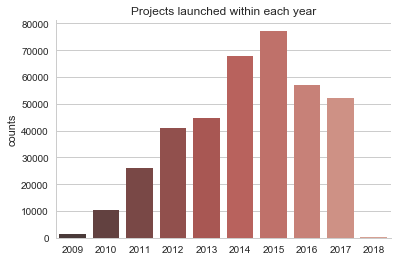

In [253]:
# Number of proposed projects for each year

sns.set_style("whitegrid")
sns.barplot(ksdf_year['counts'].index, y= ksdf_year['counts'] ,
            palette="Reds_d", saturation = 0.5).set_title("Projects launched within each year")
sns.despine(right = True, top = True)


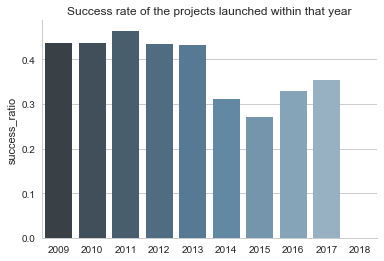

In [254]:
# Cross-year success ratio

sns.set_style("whitegrid")
sns.barplot(ksdf_year['success_ratio'].index, y= ksdf_year['success_ratio'], data = ksdf_year,
            palette="Blues_d", saturation = 0.5).set_title("Success rate of the projects launched within that year")
sns.despine(right = True, top = True)

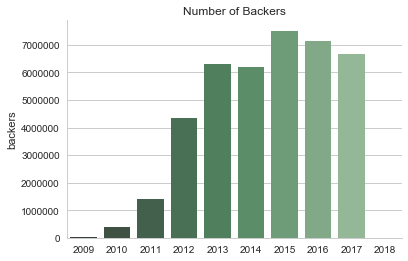

In [255]:
#Backers during that year

sns.set_style("whitegrid")
sns.barplot(ksdf_year['backers'].index, y= ksdf_year['backers'] ,
            palette="Greens_d", saturation = 0.5).set_title("Number of Backers")
sns.despine(right = True, top = True)

*** 

- Cross month comparison of successful rate and overall number of proposed projects
***


In [256]:
ksdf_month = {}
for month in range(1, 13):
    ksdf_month[month] = ksdf[ksdf["launched_month"] == month]["launched_month"].count()

In [257]:
ksdf_month = pd.Series(ksdf_month)
ksdf_month = pd.DataFrame(ksdf_month)
ksdf_month = ksdf_month.rename(columns = {0: "counts"})

ksdf_month

,counts
1,27833
2,29732
3,33946
4,32260
5,32888
6,32622
7,36367
8,32291
9,31069
10,33490


In [258]:
#Calculting the success rate by month

success_permonth = []

for month in range(1, 13):
    success = len (ksdf[(ksdf['launched_month'] == month) & (ksdf['state'] == 'successful')]['state'])
    overall = len (ksdf[ksdf['launched_month'] == month]['launched_month'])
    ratio = success/ overall
    success_permonth.append(ratio)
    print ("Month = ", month ,"with success ratio of", ratio * 100, '%')

Month =  1 with success ratio of 34.06028814716343 %
Month =  2 with success ratio of 37.00726489977129 %
Month =  3 with success ratio of 37.857184940788315 %
Month =  4 with success ratio of 37.48605083694978 %
Month =  5 with success ratio of 36.675991243006564 %
Month =  6 with success ratio of 36.08914229660965 %
Month =  7 with success ratio of 32.11977892044986 %
Month =  8 with success ratio of 33.5077885478926 %
Month =  9 with success ratio of 36.14857253210596 %
Month =  10 with success ratio of 36.876679605852495 %
Month =  11 with success ratio of 35.787041259995746 %
Month =  12 with success ratio of 29.41151184284056 %


In [259]:
ksdf_month['success_ratio'] = success_permonth

ksdf_month.head()

,counts,success_ratio
1,27833,0.340603
2,29732,0.370073
3,33946,0.378572
4,32260,0.374861
5,32888,0.366760


In [260]:
#Identifying the number of backers per month

backers_permonth = {}
for month in range(1, 13):
    backers_count = ksdf[ksdf['launched_month'] == month]['backers'].sum()
    backers_permonth[month] = backers_count

In [261]:
#Adding to ksdf_year

ksdf_month['backers'] = pd.Series(backers_permonth)

ksdf_month

,counts,success_ratio,backers
1,27833,0.340603,2871667
2,29732,0.370073,3148105
3,33946,0.378572,3681058
4,32260,0.374861,3508576
5,32888,0.366760,3877782
6,32622,0.360891,3411696
7,36367,0.321198,3555269
8,32291,0.335078,3162870
9,31069,0.361486,3622061
10,33490,0.368767,3901859


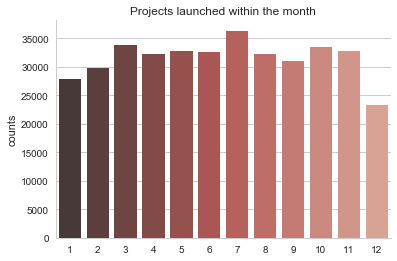

In [262]:
# Number of proposed projects for each month

sns.set_style("whitegrid")
sns.barplot(ksdf_month['counts'].index, y= ksdf_month['counts'] ,
            palette="Reds_d", saturation = 0.5).set_title("Projects launched within the month")
sns.despine(right = True, top = True)


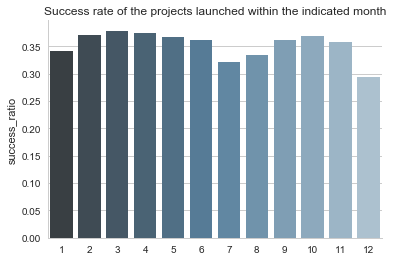

In [263]:
# Cross-month success ratio

sns.set_style("whitegrid")
sns.barplot(ksdf_month['success_ratio'].index, y= ksdf_month['success_ratio'], data = ksdf_month,
            palette="Blues_d", saturation = 0.5).set_title("Success rate of the projects launched within the indicated month")
sns.despine(right = True, top = True)

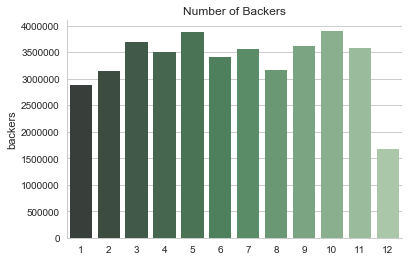

In [264]:
#Backers during the indicated month

sns.set_style("whitegrid")
sns.barplot(ksdf_month['backers'].index, y= ksdf_month['backers'] ,
            palette="Greens_d", saturation = 0.5).set_title("Number of Backers")
sns.despine(right = True, top = True)

---
- Statistics of pledged amount by breaking down according to the different state. 

---

In [265]:
sum_pledged = ksdf['usd_pledged_real'].sum()
print (sum_pledged)

3430260612.7799993


In [266]:
ksdf['usd_pledged_real'].describe()

count    3.786500e+05
mean     9.059186e+03
std      9.097465e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.245600e+02
75%      4.050000e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

In [267]:
# Ratio of successful/ failed / others
success_pledged = ksdf[ksdf['state'] == "successful"]['usd_pledged_real'].sum()

fail_pledged = ksdf[ksdf['state'] == 'failed']['usd_pledged_real'].sum()

others_pledged = (ksdf[ksdf['state'] == 'canceled']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'undefined']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'live']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'suspended']['usd_pledged_real'].sum())


print ("Total amount pledged for Successful Projects is", success_pledged, "USD", "|||", success_pledged/ sum_pledged * 100,'% of the total goal target.')
print("\n")
print ("Total amount pledged for Failed Projects is",fail_pledged,"USD","|||", fail_pledged/ sum_pledged * 100,"% of the total goal target")
print("\n")
print ("Total amount pledged for other Projects is", others_pledged,"USD","|||", others_pledged/ sum_pledged * 100, "% of the total goal target")


Total amount pledged for Successful Projects is 3036889045.99 USD ||| 88.53231252096622 % of the total goal target.


Total amount pledged for Failed Projects is 261107830.00000003 USD ||| 7.611894823011404 % of the total goal target


Total amount pledged for other Projects is 132263736.78999999 USD ||| 3.8557926560223943 % of the total goal target


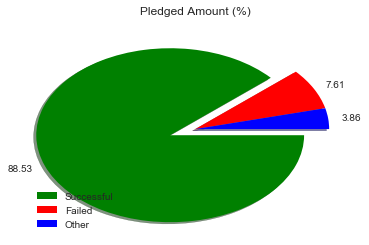

In [268]:
#Looking at how the sum of all pledges is distributed 

values = [88.53, 7.61, 3.86]
colors = ['green', 'red', 'blue']
labels = ['Successful', 'Failed', 'Other']
explode = (0.2, 0.0, 0,)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Pledged Amount (%)')
plt.legend(labels,loc=3)
plt.show()

In [269]:
success_projects = ksdf[ksdf['state'] == 'successful']['state'].count()

fail_projects  = ksdf[ksdf['state'] == 'failed']['state'].count()

others_projects  = (
    ksdf[ksdf['state'] == 'canceled']['state'].count() +
    ksdf[ksdf['state'] == 'live']['state'].count() +
    ksdf[ksdf['state'] == 'undefined']['state'].count() +
    ksdf[ksdf['state'] == 'suspended']['state'].count())

print ("Average pledged amount per successful project = ",success_pledged/success_projects,"USD", "\n")
print ("Average pledged amount per failed project = ",fail_pledged/ fail_projects,"USD", "\n")
print ("Average pledged amount per other project = ",others_pledged/ others_projects,"USD", "\n")

Average pledged amount per successful project =  22670.795231195316 USD 

Average pledged amount per failed project =  1320.6206376823325 USD 

Average pledged amount per other project =  2815.439924858444 USD 



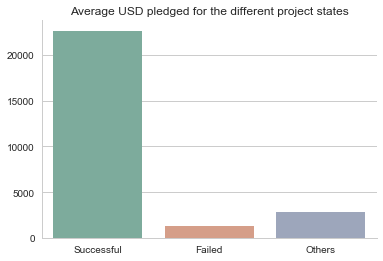

In [270]:
sns.set_style("whitegrid")
sns.barplot(["Successful", "Failed", "Others"],
            y= [22670.7952312, 1320.60381678, 2814.96055825],
            palette = "Set2",
            saturation = 0.5).set_title("Average USD pledged for the different project states")
sns.despine(right = True, top = True)

---
- Looking into projects proposed across countries.

---

In [271]:
ksdf.country.value_counts()

US      292618
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         760
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [272]:
ksdf.currency.value_counts()

USD    295356
GBP     34131
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       767
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [273]:
#replacing N,0" with country based on their respective currency
#Making the assumption that the country is based on the currency indicated 

In [274]:
ksdf[ksdf.country == 'N,0"']

,name,category,main_category,currency,goal,state,backers,country,usd_pledged_real,usd_goal_real,duration,deadline_day,deadline_year,deadline_month,launched_day,launched_year,launched_month
169,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,6500.0,undefined,0,"N,0""",555.00,6500.00,45,5,2014,9,2,2014,8
328,Duncan Woods - Chameleon EP,Music,Music,AUD,4500.0,undefined,0,"N,0""",3402.08,3211.53,21,1,2015,8,1,2015,8
632,The Making of Ashley Kelley's Debut Album,Music,Music,USD,3500.0,undefined,0,"N,0""",3576.00,3500.00,30,3,2015,4,1,2015,3
647,Butter Side Down Debut Album,Music,Music,USD,6000.0,undefined,0,"N,0""",7007.80,6000.00,24,3,2015,11,0,2015,11
749,Chase Goehring debut EP,Music,Music,USD,3000.0,undefined,0,"N,0""",3660.38,3000.00,27,0,2016,3,1,2016,2
824,Spencer Capier Instrumental Project 2015,Music,Music,CAD,4000.0,undefined,0,"N,0""",4251.14,3572.39,30,4,2014,10,2,2014,9
844,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,5000.0,undefined,0,"N,0""",6370.00,5000.00,27,3,2015,6,4,2015,5
864,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,6000.0,undefined,0,"N,0""",6695.00,6000.00,28,5,2015,11,5,2015,10
870,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2750.0,undefined,0,"N,0""",2926.00,2750.00,45,5,2015,3,2,2015,2
890,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,1200.0,undefined,0,"N,0""",1585.00,1200.00,30,4,2015,12,2,2015,11


In [275]:
country_list = {"USD":"US", 
                "GBP":"GB", 
                "CAD":"CA", 
                "EUR":"EU", 
                "AUD":"AU",
                "SEK":"SE",
                "NZD":"NZ",
                "DKK":"DK",
                "NOK":"NO",
                "CHF":"CH"}

In [276]:
for i in ksdf.index:
    if ksdf.loc[i,"country"]== 'N,0"':
         ksdf.loc[i,"country"] = ksdf.loc[i,"currency"]

In [277]:
ksdf = ksdf.replace({"country":country_list})

ksdf.country.value_counts()

US    295356
GB     34131
CA     14962
AU      7950
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1788
MX      1752
NZ      1475
DK      1129
IE       811
CH       767
NO       722
HK       618
BE       617
AT       597
SG       555
EU       186
LU        62
JP        40
Name: country, dtype: int64

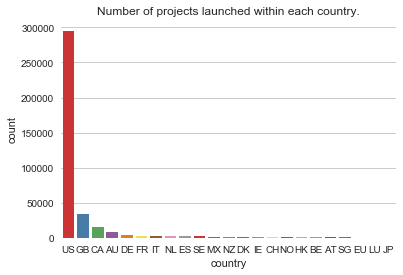

In [278]:
sns.countplot(ksdf['country'], palette = 'Set1', order = ksdf['country'].value_counts().index).set_title("Number of projects launched within each country.")
sns.despine(bottom = True, left = True)

In [279]:
us = ksdf[ksdf['country'] == "US"]['country'].count()
print (us/len(ksdf['country']) * 100, "%", "of the projects launched came from US")

78.00237686517892 % of the projects launched came from US


In [280]:
# calculating the percentage of success within each country

x = ksdf[ksdf.state == "successful"].groupby("country").count()


In [281]:
y = x.state

Text(0.5,1,'Percentage of Successful Kickstart Projects in each country')

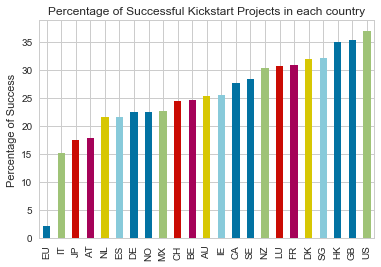

In [282]:
#calculating the percentage of successful project in each country 

success_country = ((y / ksdf.country.value_counts())*100).sort_values()

success_country.plot(kind="bar")
plt.ylabel("Percentage of Success")
plt.title("Percentage of Successful Kickstart Projects in each country")

----
Observation:

- There's not surge in successful projects in USA despite being the origin to more than 70% of the projects launched
- Will not categorize the rest of the countries into "Other" VS US

---
- Projects proposed across main categories
- Pledged amount across main categories
- Success rate across main categories 

----

In [283]:
#Finding the pledged amount across main categories

pledged_sum = {}
for category in list(set(ksdf['main_category'])):
    amount = ksdf[ksdf['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount

# Create dataframe
ksdf_cate = pd.Series(pledged_sum)
ksdf_cate = pd.DataFrame(ksdf_cate)
ksdf_cate = ksdf_cate.rename(columns = {0:"pledged_sum"})

ksdf_cate.head()

,pledged_sum
Art,9.068023e+07
Comics,7.151839e+07
Crafts,1.438428e+07
Dance,1.301070e+07
Design,7.342202e+08


In [284]:
#Adding count of projects per main category

cate_count = {}

for category in list(set(ksdf['main_category'])):
    count = ksdf[ksdf['main_category'] == category]['main_category'].count()
    cate_count[category] = count
    
ksdf_cate['count'] = pd.Series(cate_count)

ksdf_cate.head()

,pledged_sum,count
Art,9.068023e+07,28151
Comics,7.151839e+07,10819
Crafts,1.438428e+07,8809
Dance,1.301070e+07,3768
Design,7.342202e+08,30068


In [285]:
#Finding out the average pledged amount

ksdf_cate['average_amount'] = ksdf_cate['pledged_sum']/ ksdf_cate['count']
ksdf_cate.head()

,pledged_sum,count,average_amount
Art,9.068023e+07,28151,3221.207989
Comics,7.151839e+07,10819,6610.443828
Crafts,1.438428e+07,8809,1632.907282
Dance,1.301070e+07,3768,3452.946356
Design,7.342202e+08,30068,24418.658819


In [286]:
#Calculating the percentage of success

success = {}
for category in list(set(ksdf['main_category'])):
    success_count = len(ksdf[(ksdf['main_category'] == category) & 
         (ksdf['state'] == "successful")])
    success[category] = success_count

ksdf_cate["success_count"] = pd.Series(success)
ksdf_cate.head()

,pledged_sum,count,average_amount,success_count
Art,9.068023e+07,28151,3221.207989,11510
Comics,7.151839e+07,10819,6610.443828,5842
Crafts,1.438428e+07,8809,1632.907282,2115
Dance,1.301070e+07,3768,3452.946356,2338
Design,7.342202e+08,30068,24418.658819,10550


In [287]:
ksdf_cate["success_rate"] = ksdf_cate['success_count']/ ksdf_cate['count']

ksdf_cate.head()

,pledged_sum,count,average_amount,success_count,success_rate
Art,9.068023e+07,28151,3221.207989,11510,0.408866
Comics,7.151839e+07,10819,6610.443828,5842,0.539976
Crafts,1.438428e+07,8809,1632.907282,2115,0.240095
Dance,1.301070e+07,3768,3452.946356,2338,0.620488
Design,7.342202e+08,30068,24418.658819,10550,0.350871


In [288]:
pledged_goal = {}
for category in list(set(ksdf['main_category'])):
    amount = ksdf[ksdf['main_category'] == category]['usd_goal_real'].sum()
    pledged_goal[category] = amount

In [289]:
ksdf_cate['pledged_goal'] = pd.Series(pledged_goal)

ksdf_cate.head()

,pledged_sum,count,average_amount,success_count,success_rate,pledged_goal
Art,9.068023e+07,28151,3221.207989,11510,0.408866,1.103508e+09
Comics,7.151839e+07,10819,6610.443828,5842,0.539976,2.117433e+08
Crafts,1.438428e+07,8809,1632.907282,2115,0.240095,9.191721e+07
Dance,1.301070e+07,3768,3452.946356,2338,0.620488,3.612882e+07
Design,7.342202e+08,30068,24418.658819,10550,0.350871,1.259070e+09


In [290]:
#Calculating the average pledged goal for each project

ksdf_cate['average_goal'] = ksdf_cate['pledged_goal']/ ksdf_cate['count']
ksdf_cate.head()

,pledged_sum,count,average_amount,success_count,success_rate,pledged_goal,average_goal
Art,9.068023e+07,28151,3221.207989,11510,0.408866,1.103508e+09,39199.584623
Comics,7.151839e+07,10819,6610.443828,5842,0.539976,2.117433e+08,19571.430669
Crafts,1.438428e+07,8809,1632.907282,2115,0.240095,9.191721e+07,10434.466228
Dance,1.301070e+07,3768,3452.946356,2338,0.620488,3.612882e+07,9588.328548
Design,7.342202e+08,30068,24418.658819,10550,0.350871,1.259070e+09,41874.073930


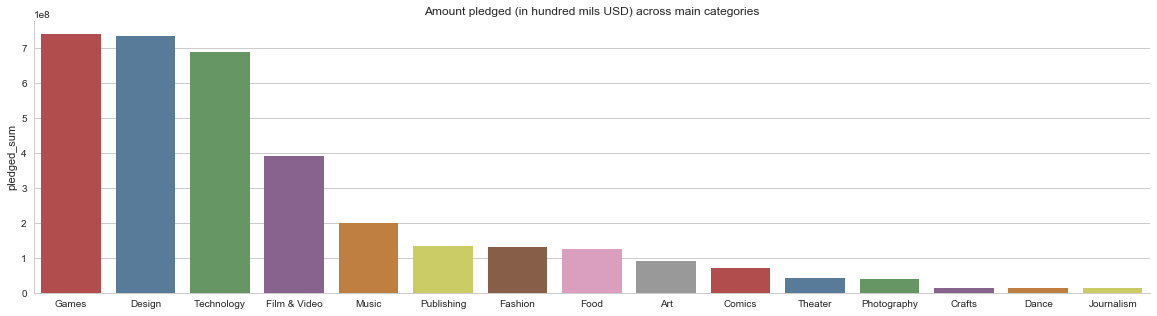

In [291]:
# pledged_sum plot

ksdf_cate = ksdf_cate.sort_values('pledged_sum',  ascending = False)
plt.subplots(figsize = (20,5))

sns.set_style("whitegrid")
sns.barplot(ksdf_cate['pledged_sum'].index, y= ksdf_cate['pledged_sum'] ,
            palette="Set1",saturation = 0.5).set_title("Amount pledged (in hundred mils USD) across main categories")
sns.despine(right = True, top = True)

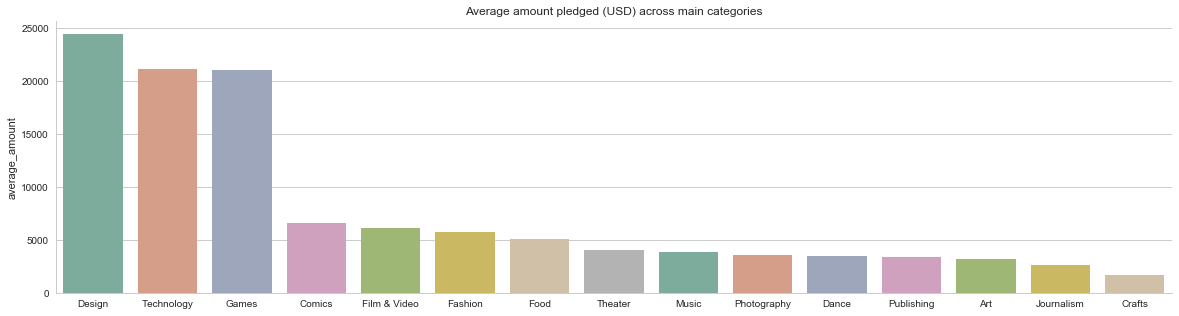

In [292]:
# avarage amount plot

ksdf_cate = ksdf_cate.sort_values('average_amount',  ascending = False)
plt.subplots(figsize = (20,5))

sns.set_style("whitegrid")
sns.barplot(ksdf_cate['average_amount'].index, y= ksdf_cate['average_amount'] ,
            palette="Set2",saturation = 0.5).set_title("Average amount pledged (USD) across main categories")
sns.despine(right = True, top = True)

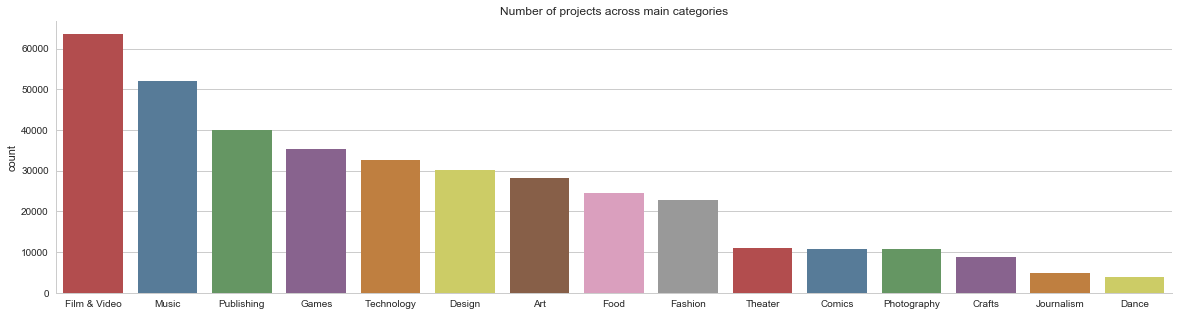

In [293]:
# count plot

ksdf_cate = ksdf_cate.sort_values('count',  ascending = False)
plt.subplots(figsize = (20,5))

sns.set_style("whitegrid")
sns.barplot(ksdf_cate['count'].index, y= ksdf_cate['count'] ,
            palette="Set1",saturation = 0.5).set_title("Number of projects across main categories")
sns.despine(right = True, top = True)

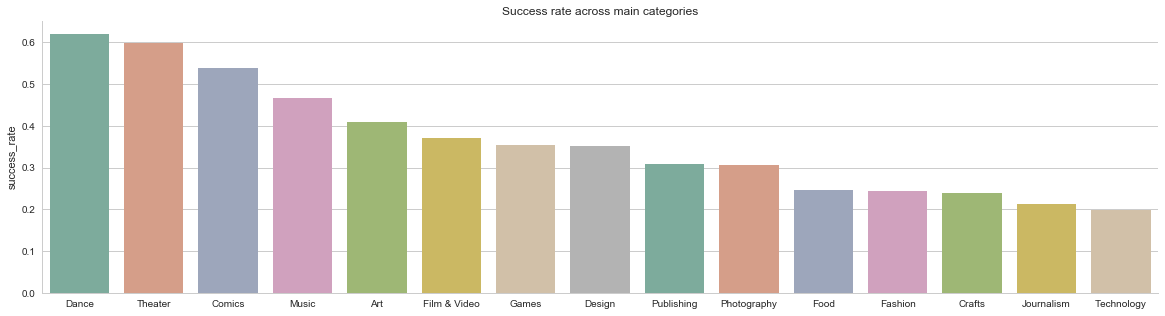

In [294]:
# success per category plot

ksdf_cate = ksdf_cate.sort_values('success_rate',  ascending = False)
plt.subplots(figsize = (20,5))

sns.set_style("whitegrid")
sns.barplot(ksdf_cate['success_rate'].index, y= ksdf_cate['success_rate'] ,
            palette="Set2",saturation = 0.5).set_title("Success rate across main categories")
sns.despine(right = True, top = True)

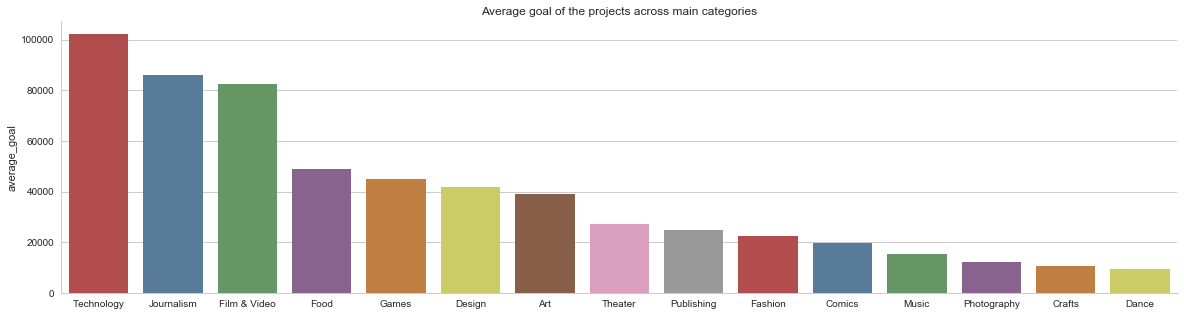

In [295]:
#Average goal plot

ksdf_cate = ksdf_cate.sort_values('average_goal',  ascending = False)
plt.subplots(figsize = (20,5))

sns.set_style("whitegrid")
sns.barplot(ksdf_cate['average_goal'].index, y= ksdf_cate['average_goal'] ,
            palette="Set1",saturation = 0.5).set_title("Average goal of the projects across main categories")
sns.despine(right = True, top = True)

--- 
- Identifying the categories that attract most backers

---

In [296]:
#Cal the number of backers per main category

back_cate = {}

for category in set(ksdf['main_category']):
    backers = ksdf[ksdf['main_category'] == category]['backers'].sum()
    back_cate[category] = backers

backers = pd.Series(back_cate)
ksdf_cate['backers'] = backers

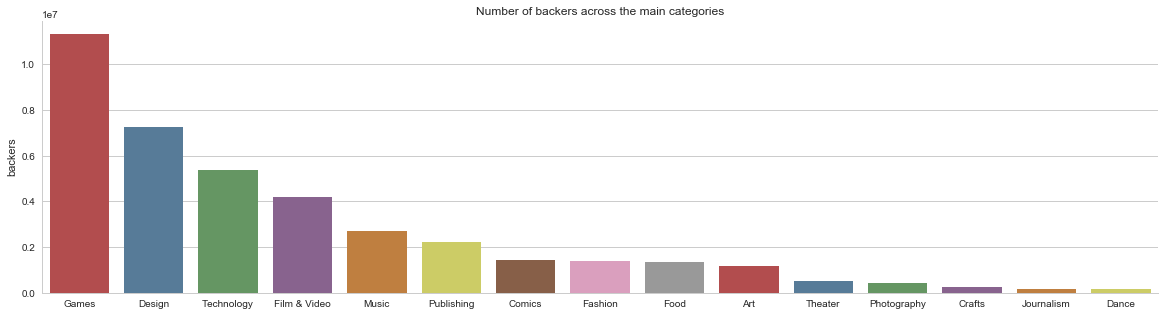

In [297]:
ksdf_cate = ksdf_cate.sort_values('backers',  ascending = False)
plt.subplots(figsize = (20,5))

sns.set_style("whitegrid")
sns.barplot(ksdf_cate['backers'].index, y= ksdf_cate['backers'] ,
            palette="Set1",saturation = 0.5).set_title("Number of backers across the main categories")
sns.despine(right = True, top = True)

# Modeling

Encode state column to binary

- successful -> 1
- failed -> 0
- else -> delete

In [298]:
print (ksdf['state'].value_counts())
print ('')
print ("ksdf.shape = ", ksdf.shape)

failed        197716
successful    133956
canceled       38773
undefined       3562
live            2799
suspended       1844
Name: state, dtype: int64

ksdf.shape =  (378650, 17)


In [299]:
def state_change(cell_value):
    if cell_value == 'successful':
        return 1
    
    elif cell_value == 'failed':
        return 0
    
    else:
        return 'del'

In [300]:
ksdf['state'] = ksdf['state'].apply(state_change)
print ("Successful = ",ksdf[ksdf['state'] == 1].shape)
print ("Failed = ", ksdf[ksdf['state'] == 0].shape)
print ("Deleted other =", ksdf[ksdf['state'] == 'del'].shape,"\n")
print ("Successful + Failed =", ksdf[ksdf['state'] == 1].shape[0] + ksdf[ksdf['state'] == 0].shape[0])

Successful =  (133956, 17)
Failed =  (197716, 17)
Deleted other = (46978, 17) 

Successful + Failed = 331672


---
Concatenate new DataFrame

- Main_category
- Category
- Duration
- deadline_month
- launched_month
- Country
- State

----

In [301]:
ksdf_rf_pre = ksdf.drop(ksdf[ksdf['state'] == 'del'].index)

print (ksdf_rf_pre.shape)

(331672, 17)


In [302]:
ksdf_rf_pre.head(5)

,name,category,main_category,currency,goal,state,backers,country,usd_pledged_real,usd_goal_real,duration,deadline_day,deadline_year,deadline_month,launched_day,launched_year,launched_month
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0,0,GB,0.0,1533.95,59,4,2015,10,1,2015,8
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,0,15,US,2421.0,30000.00,60,2,2017,11,5,2017,9
2,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,0,3,US,220.0,45000.00,45,1,2013,2,5,2013,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,0,1,US,1.0,5000.00,30,0,2012,4,5,2012,3
5,Monarch Espresso Bar,Restaurants,Food,USD,50000.0,1,224,US,52375.0,50000.00,35,4,2016,4,4,2016,2


In [303]:
ksdf_rf = pd.concat([
                  ksdf_rf_pre['main_category'],
                  ksdf_rf_pre['duration'],
                  ksdf_rf_pre['category'],
                  ksdf_rf_pre['deadline_month'],
                  ksdf_rf_pre['launched_month'],
                  ksdf_rf_pre['country'],
                  ksdf_rf_pre['state']], axis = 1
                 )

print (ksdf_rf.shape)

(331672, 7)


---
Data Split:

- Train: 70%
- Test: 30%

----

In [304]:
train, test = sklearn.model_selection.train_test_split(ksdf_rf, test_size = 0.3, random_state = 42)

print ("Train shape = ", train.shape, ",", len(train)/ len(ksdf_rf) * 100, "%")
print ("Test shape = ", test.shape, ",", len(test)/ len(ksdf_rf) * 100, "%")

Train shape =  (232170, 7) , 69.99987939892424 %
Test shape =  (99502, 7) , 30.000120601075764 %


In [305]:
X_train = pd.concat(
    [
     pd.get_dummies(train['main_category'], prefix = 'main_category'),
     train["duration"]
    ], axis=1)

Y_train = train['state']

In [306]:
X_test = pd.concat(
    [
     pd.get_dummies(test['main_category'], prefix = 'main_category'),
     test["duration"]
    ], axis=1)

Y_test = test['state']

In [307]:
X_train = X_train.astype(int)
Y_train = Y_train.astype(int)
X_test = X_test.astype(int)
Y_test = Y_test.astype(int)

print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(232170, 16)
(232170,)
(99502, 16)
(99502,)


--- 
RANDOM FOREST

---

In [308]:
for_record = {
    'baseline':{},
    'best_random1':{},
    'best_random2':{},
    'best_random3':{},
    'grid1':{},
    'grid2':{}
}

In [309]:
start = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)
end = time.time()
sec = end - start
Y_pred = rf.predict(X_train)

In [310]:
for_record['baseline']['params'] = rf.get_params()
for_record['baseline']['time'] = sec
for_record['baseline']["train_score"] = rf.score(X_train, Y_train)
for_record['baseline']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['baseline']['test_score'] = rf.score(X_test, Y_test)

---
Random Search 1

----

In [311]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(2, 100, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in range(2,50,10)]
max_depth = [int(x) for x in range(1,10,1)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_rand1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random1 = RandomizedSearchCV(estimator = rf, param_distributions = param_rand1, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random1.fit(X_train, Y_train)

# Use best random parameters to train a new model
start = time.time()
rf_rand1 = RandomForestClassifier(bootstrap = rf_random1.best_params_['bootstrap'],
                                 max_depth = rf_random1.best_params_['max_depth'],
                                 max_features = rf_random1.best_params_['max_features'],
                                 min_samples_leaf = rf_random1.best_params_['min_samples_leaf'],
                                 min_samples_split = rf_random1.best_params_['min_samples_split'],
                                 n_estimators = rf_random1.best_params_['n_estimators'],
                                 random_state = 42, n_jobs = -1)

rf_rand1.fit(X_train, Y_train)
end = time.time()
rand1_time = end - start
Y_pred = rf_rand1.predict(X_train)

for_record['best_random1']['params'] = rf_rand1.get_params()
for_record['best_random1']['time'] = rand1_time
for_record['best_random1']["train_score"] = rf_rand1.score(X_train, Y_train)
for_record['best_random1']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['best_random1']['test_score'] = rf_rand1.score(X_test, Y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=42, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 
[CV] n_estimators=42, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 
[CV] n_estimators=42, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 
[CV] n_estimators=2, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=2, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.3s
[CV] n_estimators=2, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=2, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.3s
[CV] n_estimators=2, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimat

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   45.7s finished


In [312]:
print (for_record['best_random1']['test_score'])

0.6406403891379068


In [313]:
rf_rand1

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [314]:
!pip install yellowbrick

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


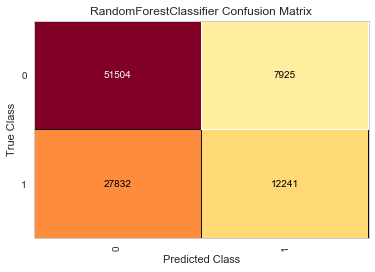

In [315]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf_rand1, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, Y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, Y_test)

# How did we do?
cm.poof()

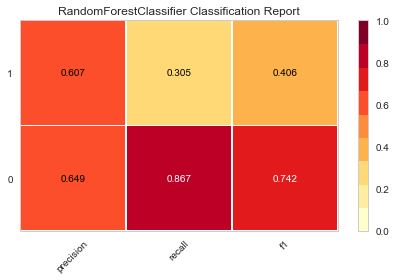

In [316]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf_rand1)

visualizer.fit(X_train, Y_train)  # Fit the visualizer and the model
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## http://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

----
- Precision: for all instances classified positive, what percent was correct?
- Recall: for all instances that were actually positive, what percent was classified correctly?

---

**Observation:**

- The model is good at predicting failed project because the recall for "0" is much higher. This might be because of the imbalanced dataset of 60:40.

In [317]:
from yellowbrick.classifier import ROCAUC

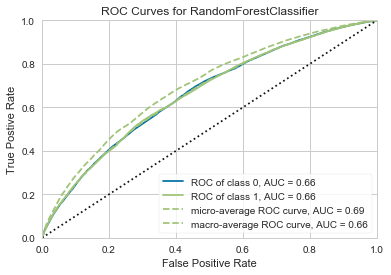

In [318]:
visualizer = ROCAUC(rf_rand1)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [319]:
for_record

{'baseline': {'f1': 0.6257056907043478,
  'params': {'bootstrap': True,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 'auto',
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_impurity_split': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 10,
   'n_jobs': 1,
   'oob_score': False,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False},
  'test_score': 0.642358947558843,
  'time': 1.6594760417938232,
  'train_score': 0.647956238962829},
 'best_random1': {'f1': 0.6074838726543754,
  'params': {'bootstrap': False,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': 9,
   'max_features': 'sqrt',
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_impurity_split': None,
   'min_samples_leaf': 1,
   'min_samples_split': 10,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 42,
   'n_jobs': -1,
   'oob_score': False,
   'r